In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [67]:
matplotlib_axes_logger.setLevel('ERROR')

In [68]:
zero_one_colourmap_pts = ListedColormap(('red', 'green'))
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))

In [69]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [70]:
def generate_clf(input_gamma, input_C=1):
  classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
  classifier.fit(X, y.ravel())
  y_pred = classifier.predict(X)
  print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
  return classifier

In [71]:
X, y = make_classification(n_samples=200, n_features=2,
n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=44)

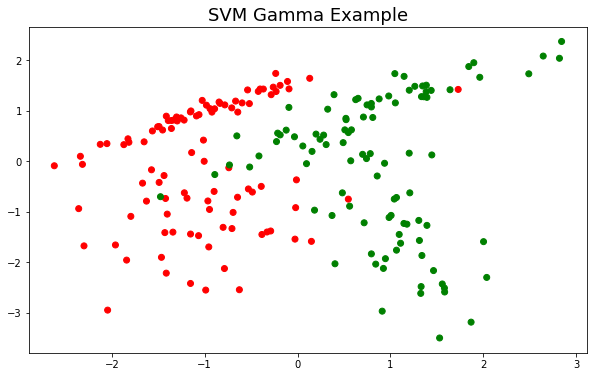

In [72]:
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)

# Classifier 1 - Gamma = 0.001

In [73]:
classifier_1 = generate_clf(0.001)

Training Accuracy = 0.505


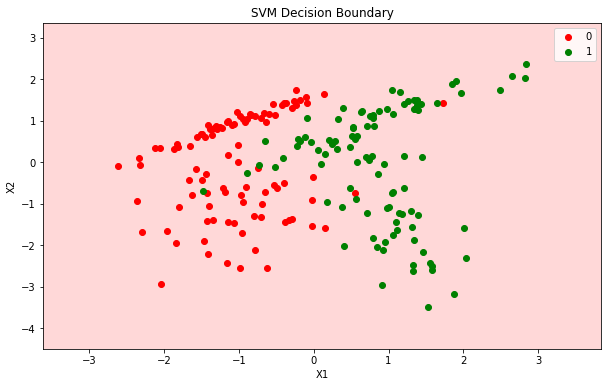

In [74]:
plot_decision_boundary(X, y, classifier_1)

# Classifier 2 - Gamma = 0.01

In [75]:
classifier_2 = generate_clf(0.01)

Training Accuracy = 0.505


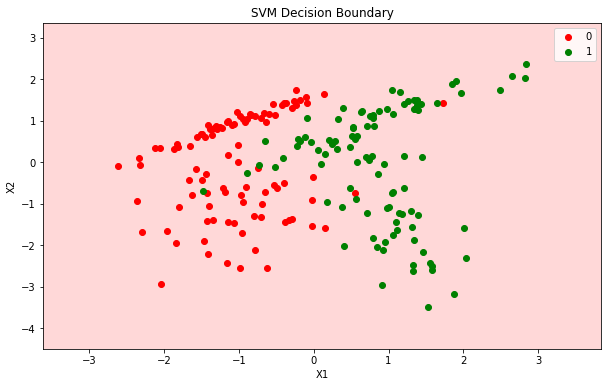

In [76]:
plot_decision_boundary(X, y, classifier_2)

# Classifier 3 - Gamma = 0.1

In [77]:
classifier_3 = generate_clf(0.1)

Training Accuracy = 0.795


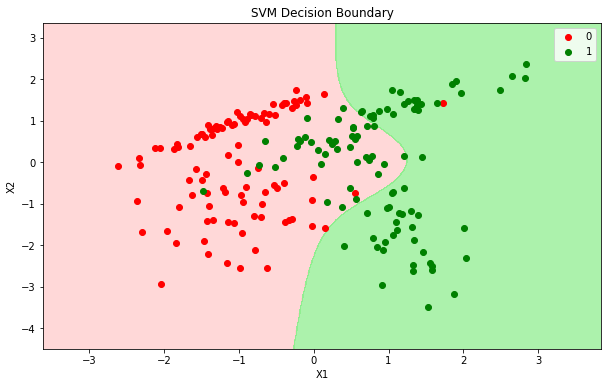

In [78]:
plot_decision_boundary(X, y, classifier_3)

# Classifier 4 - Gamma = 1

In [79]:
classifier_4 = generate_clf(1)

Training Accuracy = 0.93


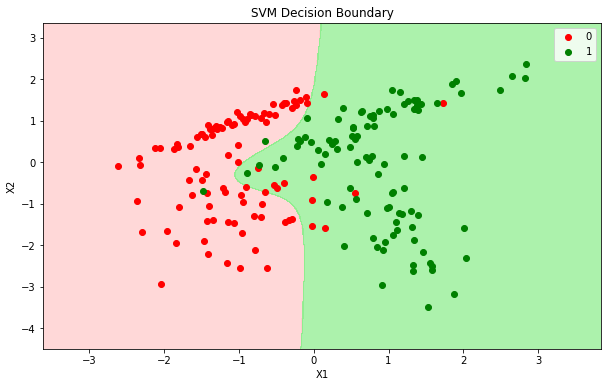

In [80]:
plot_decision_boundary(X, y, classifier_4)

# Classifier 5 - Gamma = 0.1 & C = 0.1

In [81]:
classifier_5 = generate_clf(0.1, 0.1)

Training Accuracy = 0.605


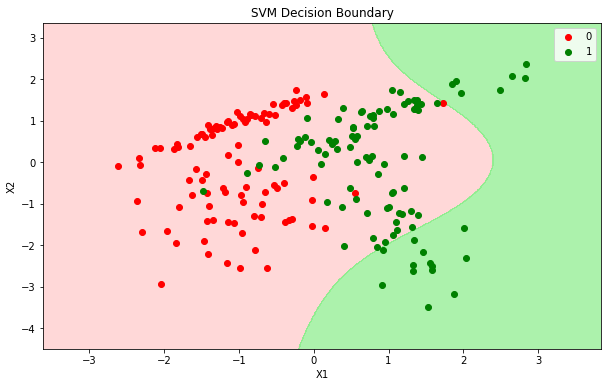

In [82]:
plot_decision_boundary(X, y, classifier_5)

# Classifier 6 - Gamma = 0.1 & C = 1


In [83]:
classifier_6 = generate_clf(0.1, 1)

Training Accuracy = 0.795


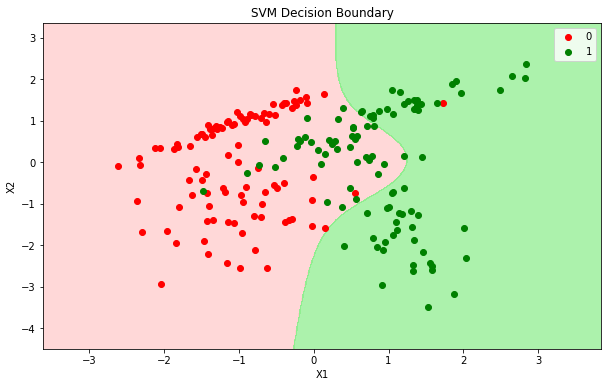

In [84]:
plot_decision_boundary(X, y, classifier_6)

# Classifier 7 - Gamma = 0.1 & C = 10


In [85]:
classifier_7 = generate_clf(0.1, 10)

Training Accuracy = 0.94


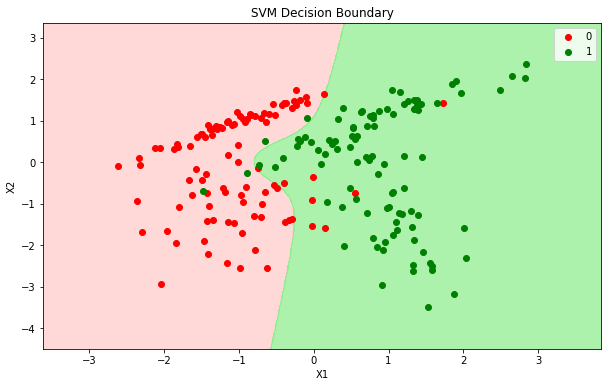

In [86]:
plot_decision_boundary(X, y, classifier_7)